# **Step 3 --- Feature Engineering**

In [1]:
#Importing all the necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install ta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import ta

In [6]:
# Converting the saved csv file to a Pandas DataFrame
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\LuxDev DSA\Capstone-Project\Crypto-BuySell-Model\notebooks\data\processed\BTCUSDT_1d.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 86.1+ KB


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-03-10,20362.21,20367.78,19549.09,20150.69,618456.46710,2023-03-10 23:59:59.999,1.234499e+10,12106261.0,308155.80993,6.151475e+09
1,2023-03-11,20150.69,20686.51,19765.03,20455.73,427831.82133,2023-03-11 23:59:59.999,8.651591e+09,10412300.0,213151.47855,4.310534e+09
2,2023-03-12,20455.73,22150.00,20270.60,21997.11,430944.94288,2023-03-12 23:59:59.999,8.982418e+09,9721933.0,218639.06880,4.558128e+09
3,2023-03-13,21998.05,24500.00,21813.88,24113.48,687889.31259,2023-03-13 23:59:59.999,1.582500e+10,14820760.0,346688.17025,7.976620e+09
4,2023-03-14,24112.27,26386.87,23976.42,24670.41,699360.93423,2023-03-14 23:59:59.999,1.746531e+10,15223589.0,351739.11994,8.783916e+09


In [ ]:
#df = df.drop("1_day_return",axis=1)
#df.info()

KeyError: "['1_day_return'] not found in axis"

In [7]:
#Computing the 1 day percentage return and adding it as a new feature to the DataFrame
df['return_1d'] = df['close'].pct_change(1)
df['return_1d']

0           NaN
1      0.015138
2      0.075352
3      0.096211
4      0.023096
         ...   
995   -0.000971
996   -0.004873
997   -0.045086
998    0.057853
999    0.021658
Name: return_1d, Length: 1000, dtype: float64

In [8]:
#Computing the 7 day percentage return and adding it as a new feature to the DataFrame
df['return_7d'] = df['close'].pct_change(7)
df['return_7d']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    0.071545
996    0.040654
997   -0.022809
998    0.044728
999    0.030622
Name: return_7d, Length: 1000, dtype: float64

In [9]:
#Calculating the rolling volatility (standard deviation of percentage returns) over a 7-day window
df["rolling_volatility"] = df["close"].pct_change().rolling(7).std()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  rolling_volatility  993 non-null    float64
dtypes: float64(12), object(2)
memory usage: 109.5+ KB


In [17]:
df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume,return_1d,return_7d,rolling_volatility
995,2025-11-29,90890.71,91165.65,90155.47,90802.44,7429.88291,2025-11-29 23:59:59.999,6.737257e+08,1677860.0,3359.04932,3.046142e+08,-0.000971,0.071545,0.016751
996,2025-11-30,90802.44,92000.01,90336.90,90360.00,9687.74175,2025-11-30 23:59:59.999,8.840518e+08,2154030.0,5002.96698,4.566065e+08,-0.004873,0.040654,0.016162
997,2025-12-01,90360.01,90417.00,83822.76,86286.01,34509.01227,2025-12-01 23:59:59.999,2.977024e+09,7709685.0,15524.33346,1.338719e+09,-0.045086,-0.022809,0.024103
998,2025-12-02,86286.01,92307.65,86184.39,91277.88,28210.22732,2025-12-02 23:59:59.999,2.519515e+09,6397299.0,13512.33949,1.206200e+09,0.057853,0.044728,0.032837
999,2025-12-03,91277.88,93958.58,90990.23,93254.78,15820.09700,2025-12-03 23:59:59.999,1.466983e+09,3997706.0,8161.86719,7.568829e+08,0.021658,0.030622,0.031168


In [10]:
#Calculating technical indicators and adding them as new features to the DataFrame
#RSI
df["rsi"] = ta.momentum.RSIIndicator(df["close"]).rsi()
#SMAs
df["sma_20"] = df["close"].rolling(20).mean()
df["sma_50"] = df["close"].rolling(50).mean()
df["sma_200"] = df["close"].rolling(200).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   float64
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  rolling_volatility  993 non-null    float64
 14  rsi                 987 non-null    float64
 15  sma_20              981 non-null    float64
 16  sma_50 

In [ ]:
# Importing BollingerBands submodule from ta.volatility
from ta.volatility import BollingerBands

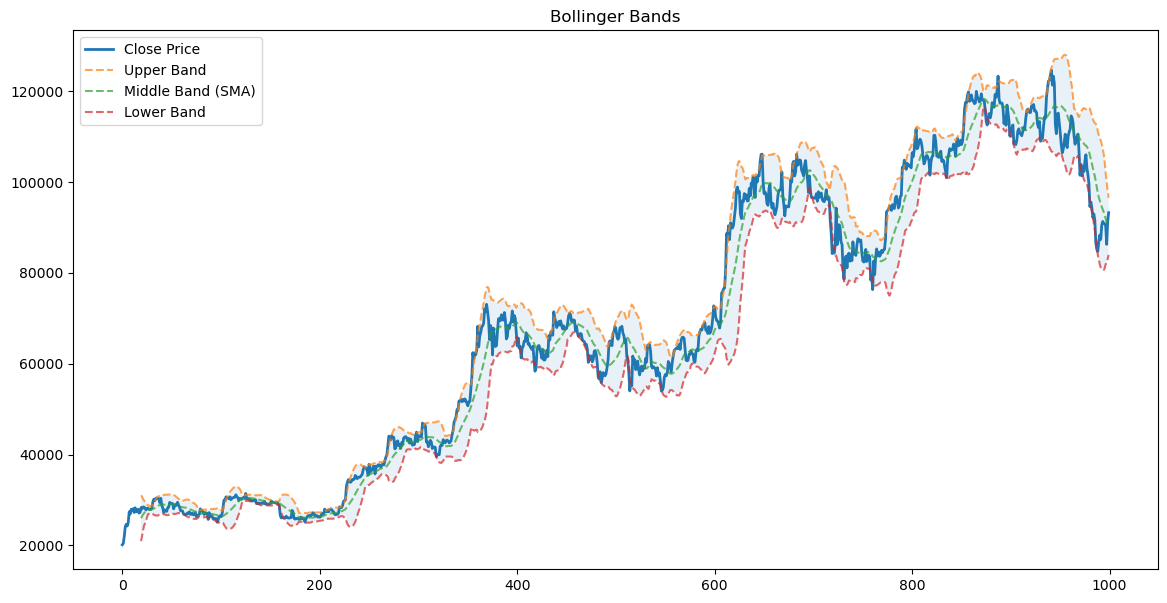

In [18]:
# Calculating Bollinger Bands
bb = ta.volatility.BollingerBands(close=df['close'], window=20, window_dev=2)

df['bb_upper'] = bb.bollinger_hband()
df['bb_middle'] = bb.bollinger_mavg()
df['bb_lower'] = bb.bollinger_lband()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', linewidth=2)
plt.plot(df.index, df['bb_upper'], label='Upper Band', linestyle='--', alpha=0.7)
plt.plot(df.index, df['bb_middle'], label='Middle Band (SMA)', linestyle='--', alpha=0.7)
plt.plot(df.index, df['bb_lower'], label='Lower Band', linestyle='--', alpha=0.7)
plt.fill_between(df.index, df['bb_upper'], df['bb_lower'], alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

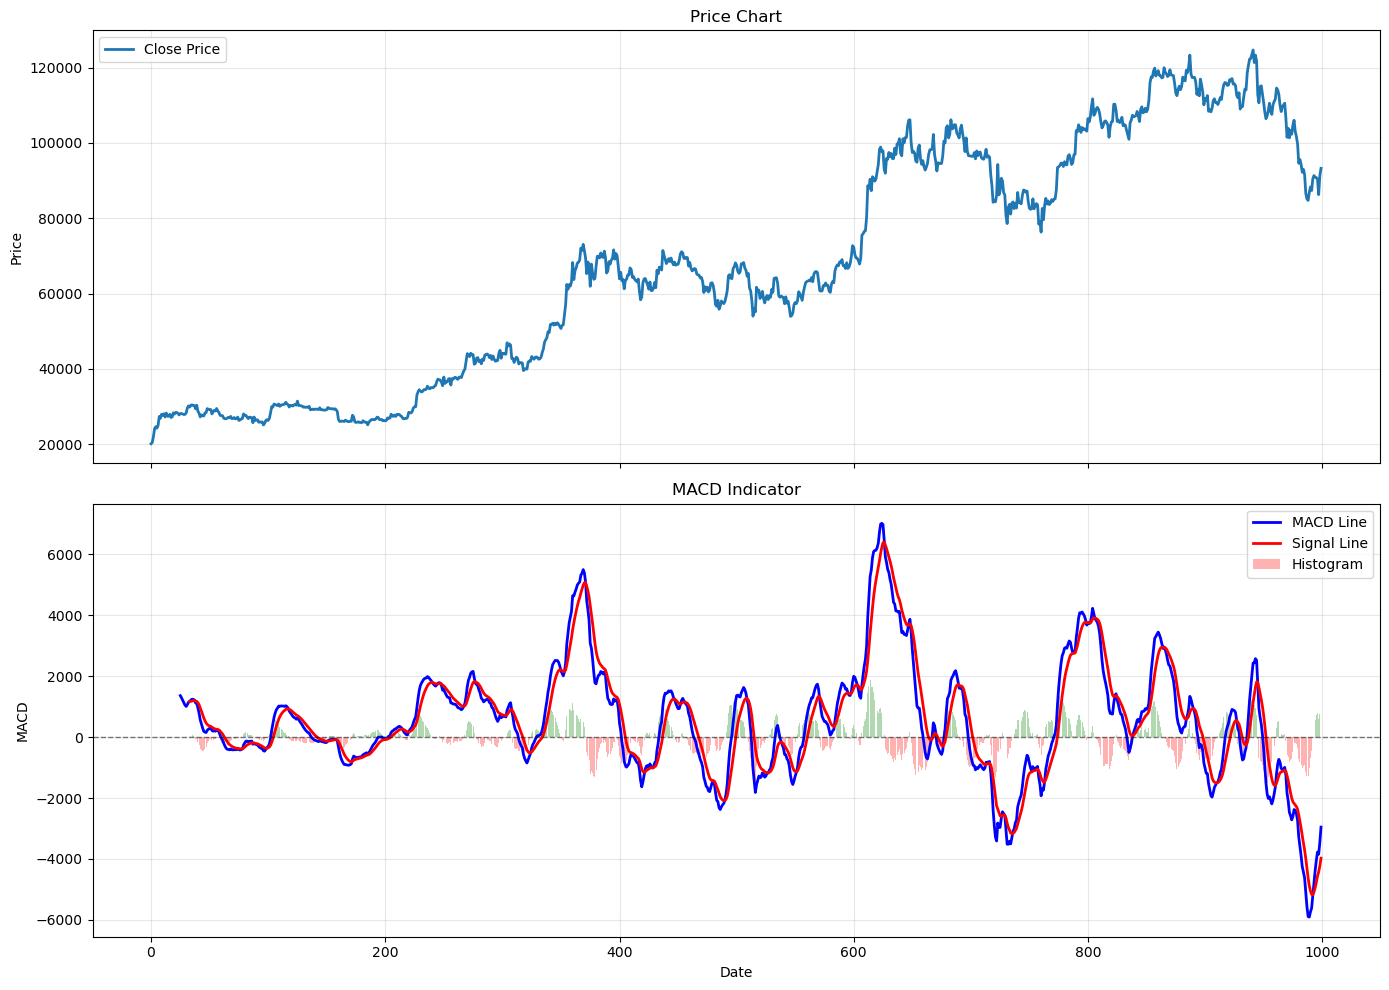

In [21]:
# Calculating MACD and adding it as new features to the DataFrame
macd_indicator = ta.trend.MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)

df['macd'] = macd_indicator.macd()
df['macd_signal'] = macd_indicator.macd_signal()
df['macd_histogram'] = macd_indicator.macd_diff()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Price
ax1.plot(df.index, df['close'], label='Close Price', linewidth=2)
ax1.set_ylabel('Price')
ax1.set_title('Price Chart')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: MACD
ax2.plot(df.index, df['macd'], label='MACD Line', linewidth=2, color='blue')
ax2.plot(df.index, df['macd_signal'], label='Signal Line', linewidth=2, color='red')

# Histogram with colors (green = positive, red = negative)
colors = ['green' if val >= 0 else 'red' for val in df['macd_histogram']]
ax2.bar(df.index, df['macd_histogram'], label='Histogram', color=colors, alpha=0.3)

# Add zero line
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.set_title('MACD Indicator')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


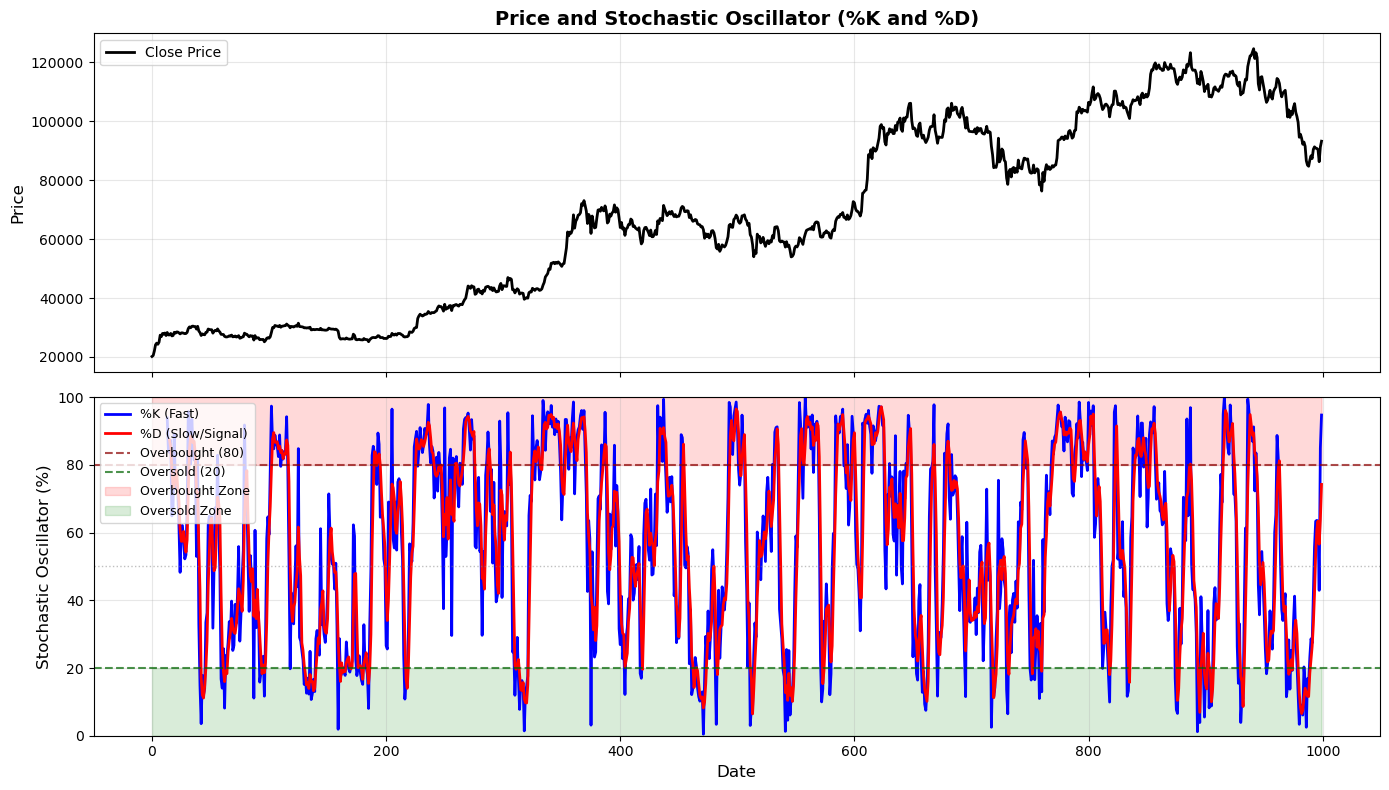

In [24]:
#Stochastic Oscillator
stoch_indicator = ta.momentum.StochasticOscillator(
    high=df['high'],
    low=df['low'],
    close=df['close'],
    window=14,
    smooth_window=3
)

df['stoch_k'] = stoch_indicator.stoch()
df['stoch_d'] = stoch_indicator.stoch_signal()

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot 1: Price
ax1.plot(df.index, df['close'], label='Close Price', linewidth=2, color='black')
ax1.set_ylabel('Price', fontsize=12)
ax1.set_title('Price and Stochastic Oscillator (%K and %D)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Stochastic with both lines
ax2.plot(df.index, df['stoch_k'], label='%K (Fast)', linewidth=2, color='blue')
ax2.plot(df.index, df['stoch_d'], label='%D (Slow/Signal)', linewidth=2, color='red')

# Add reference lines
ax2.axhline(y=80, color='darkred', linestyle='--', linewidth=1.5, alpha=0.7, label='Overbought (80)')
ax2.axhline(y=20, color='darkgreen', linestyle='--', linewidth=1.5, alpha=0.7, label='Oversold (20)')
ax2.axhline(y=50, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Fill zones
ax2.fill_between(df.index, 80, 100, alpha=0.15, color='red', label='Overbought Zone')
ax2.fill_between(df.index, 0, 20, alpha=0.15, color='green', label='Oversold Zone')

ax2.set_ylabel('Stochastic Oscillator (%)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Step 4 --- Label Generation (Target Variable)

In [25]:
#Creating target labels based on future returns
df["future_return"] = df["close"].pct_change().shift(-1)

def label(row):
    if row["future_return"] > 0.02:
        return 2
    elif row["future_return"] < -0.02:
        return 0
    else:
        return 1

df["label"] = df.apply(label, axis=1)

In [26]:
df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,bb_middle,bb_lower,macd,macd_signal,macd_histogram,stochastic_oscillator,stoch_k,stoch_d,future_return,label
995,2025-11-29,90890.71,91165.65,90155.47,90802.44,7429.88291,2025-11-29 23:59:59.999,6.737257e+08,1677860.0,3359.04932,...,92705.8300,81019.046139,-4047.396099,-4766.133245,718.737146,<ta.momentum.StochasticOscillator object at 0x...,63.625632,60.893457,-0.004873,1
996,2025-11-30,90802.44,92000.01,90336.90,90360.00,9687.74175,2025-11-30 23:59:59.999,8.840518e+08,2154030.0,5002.96698,...,91923.2735,81931.991281,-3775.553553,-4568.017307,792.463754,<ta.momentum.StochasticOscillator object at 0x...,63.200155,63.388704,-0.045086,0
997,2025-12-01,90360.01,90417.00,83822.76,86286.01,34509.01227,2025-12-01 23:59:59.999,2.977024e+09,7709685.0,15524.33346,...,91084.6245,82220.804592,-3844.535905,-4423.321026,578.785121,<ta.momentum.StochasticOscillator object at 0x...,42.958641,56.594809,0.057853,2
998,2025-12-02,86286.01,92307.65,86184.39,91277.88,28210.22732,2025-12-02 23:59:59.999,2.519515e+09,6397299.0,13512.33949,...,90565.8000,83139.215761,-3456.557681,-4229.968357,773.410677,<ta.momentum.StochasticOscillator object at 0x...,85.014968,63.724588,0.021658,2
999,2025-12-03,91277.88,93958.58,90990.23,93254.78,15820.09700,2025-12-03 23:59:59.999,1.466983e+09,3997706.0,8161.86719,...,90243.9380,83956.783058,-2955.493742,-3975.073434,1019.579692,<ta.momentum.StochasticOscillator object at 0x...,94.731476,74.235028,NaN,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              1000 non-null   object 
 1   open                   1000 non-null   float64
 2   high                   1000 non-null   float64
 3   low                    1000 non-null   float64
 4   close                  1000 non-null   float64
 5   volume                 1000 non-null   float64
 6   close_time             1000 non-null   object 
 7   quote_asset_volume     1000 non-null   float64
 8   num_trades             1000 non-null   float64
 9   taker_base_volume      1000 non-null   float64
 10  taker_quote_volume     1000 non-null   float64
 11  return_1d              999 non-null    float64
 12  return_7d              993 non-null    float64
 13  rolling_volatility     993 non-null    float64
 14  rsi                    987 non-null    float64
 15  sma_2

In [28]:
df["future_return"].value_counts()

future_return
 0.021658    1
 0.015138    1
 0.075352    1
 0.096211    1
 0.023096    1
            ..
-0.030403    1
 0.014015    1
-0.009147    1
 0.039594    1
-0.017800    1
Name: count, Length: 999, dtype: int64

In [29]:
def save_processed_csv(df, symbol, interval):

#Save a DataFrame into data/raw/(symbol_interval).csv
    os.makedirs("data/processed", exist_ok=True)
    file_path = f"data/processed/{symbol}_{interval}.csv"
    df.to_csv(file_path, index=False)
    print(f"Saved: {file_path}")

save_processed_csv(df, "BTCUSDT", "1dmodified")

Saved: data/processed/BTCUSDT_1dmodified.csv
